In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap
from mlxtend.plotting import plot_decision_regions

# Random Forests

In [2]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"]).astype(np.int)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

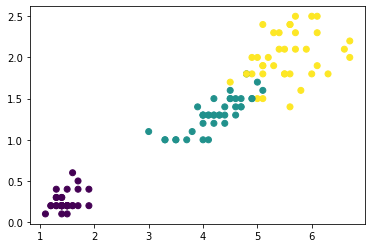

In [4]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
plt.show()

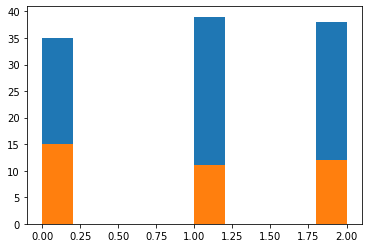

In [5]:
plt.hist(y_train)
plt.hist(y_test)
plt.show()

# Zad. 

Porównaj działanie

* RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=42)
* RandomForestClassifier(n_estimators=50, max_leaf_nodes=2, n_jobs=-1, random_state=42)
* RandomForestClassifier(n_estimators=5, max_leaf_nodes=2, n_jobs=-1, random_state=42)

In [6]:
from sklearn.ensemble import RandomForestClassifier
from mlxtend.plotting import plot_decision_regions

In [7]:
rnd_clf1 = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=42)
rnd_clf2 = RandomForestClassifier(n_estimators=50, max_leaf_nodes=2, n_jobs=-1, random_state=42)
rnd_clf3 = RandomForestClassifier(n_estimators=5, max_leaf_nodes=2, n_jobs=-1, random_state=42)

In [8]:
from sklearn.metrics import accuracy_score

for clf in (rnd_clf1, rnd_clf2, rnd_clf3):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

RandomForestClassifier 1.0
RandomForestClassifier 1.0
RandomForestClassifier 1.0


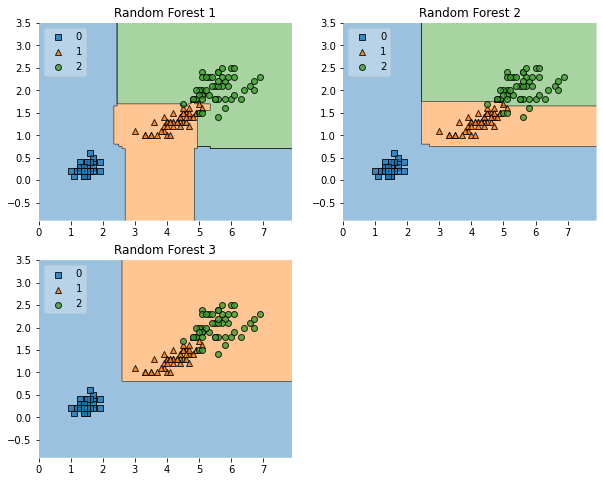

In [9]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools
gs = gridspec.GridSpec(2, 2)

fig = plt.figure(figsize=(10,8))

labels = ['Random Forest 1', 'Random Forest 2', 'Random Forest 3']
for clf, lab, grd in zip([rnd_clf1, rnd_clf2, rnd_clf3],
                         labels,
                         itertools.product([0, 1], repeat=2)):

    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    plt.title(lab)

plt.show()